# **Problem Statement**


---

#### **Business Context**  
Understanding customer personality and behavior is pivotal for businesses to enhance customer satisfaction and increase revenue. Segmentation based on a customer's personality, demographics, and purchasing behavior allows companies to create tailored marketing campaigns, improve customer retention, and optimize product offerings.  

A leading retail company with a rapidly growing customer base seeks to gain deeper insights into their customers' profiles. The company recognizes that understanding customer personalities, lifestyles, and purchasing habits can unlock significant opportunities for personalizing marketing strategies and creating loyalty programs. These insights can help address critical business challenges, such as improving the effectiveness of marketing campaigns, identifying high-value customer groups, and fostering long-term relationships with customers.  

With the competition intensifying in the retail space, moving away from generic strategies to more targeted and personalized approaches is essential for sustaining a competitive edge.  

---

#### **Objective**  
In an effort to optimize marketing efficiency and enhance customer experience, the company has embarked on a mission to identify distinct customer segments. By understanding the characteristics, preferences, and behaviors of each group, the company aims to:  
1. Develop personalized marketing campaigns to increase conversion rates.  
2. Create effective retention strategies for high-value customers.  
3. Optimize resource allocation, such as inventory management, pricing strategies, and store layouts.  

As a data scientist tasked with this project, your responsibility is to analyze the given customer data, apply machine learning techniques to segment the customer base, and provide actionable insights into the characteristics of each segment.  

---

#### **Data Dictionary**  
The dataset includes historical data on customer demographics, personality traits, and purchasing behaviors. Key attributes are:  

1. **Customer Information**  
   - **ID:** Unique identifier for each customer.  
   - **Year_Birth:** Customer's year of birth.  
   - **Education:** Education level of the customer.  
   - **Marital_Status:** Marital status of the customer.  
   - **Income:** Yearly household income (in dollars).  
   - **Kidhome:** Number of children in the household.  
   - **Teenhome:** Number of teenagers in the household.  
   - **Dt_Customer:** Date when the customer enrolled with the company.  
   - **Recency:** Number of days since the customer’s last purchase.  
   - **Complain:** Whether the customer complained in the last 2 years (1 for yes, 0 for no).  

2. **Spending Information (Last 2 Years)**  
   - **MntWines:** Amount spent on wine.  
   - **MntFruits:** Amount spent on fruits.  
   - **MntMeatProducts:** Amount spent on meat.  
   - **MntFishProducts:** Amount spent on fish.  
   - **MntSweetProducts:** Amount spent on sweets.  
   - **MntGoldProds:** Amount spent on gold products.  

3. **Purchase and Campaign Interaction**  
   - **NumDealsPurchases:** Number of purchases made using a discount.  
   - **AcceptedCmp1:** Response to the 1st campaign (1 for yes, 0 for no).  
   - **AcceptedCmp2:** Response to the 2nd campaign (1 for yes, 0 for no).  
   - **AcceptedCmp3:** Response to the 3rd campaign (1 for yes, 0 for no).  
   - **AcceptedCmp4:** Response to the 4th campaign (1 for yes, 0 for no).  
   - **AcceptedCmp5:** Response to the 5th campaign (1 for yes, 0 for no).  
   - **Response:** Response to the last campaign (1 for yes, 0 for no).  

4. **Shopping Behavior**  
   - **NumWebPurchases:** Number of purchases made through the company’s website.  
   - **NumCatalogPurchases:** Number of purchases made using catalogs.  
   - **NumStorePurchases:** Number of purchases made directly in stores.  
   - **NumWebVisitsMonth:** Number of visits to the company’s website in the last month.  

# **Let's start coding!**

## **Importing necessary libraries**

In [1]:
# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

# to scale the data using z-score
from sklearn.preprocessing import StandardScaler

# to compute distances
from scipy.spatial.distance import cdist, pdist

# to perform k-means clustering and compute silhouette scores
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# to visualize the elbow curve and silhouette scores
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

# to suppress warnings
import warnings

warnings.filterwarnings("ignore")

## **Loading the data**

In [2]:
# uncomment and run the following line if using Google Colab
# from google.colab import drive
# drive.mount('/content/drive')

In [3]:
# loading data into a pandas dataframe
# Create copy to keep original data
Customer_Personality_Segmentation_Data = pd.read_csv("/content/Customer_Personality_Segmentation.csv", sep="\t")
df = Customer_Personality_Segmentation_Data.copy()

## **Data Overview**

#### **Question 1**: What are the data types of all the columns?

In [4]:
#taking a look to the data
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


In [5]:
#checking the data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

##### **Observations:**
* There are three different data types: int64, float64 and object.
* There are 3 object columns :Education, Marital_Status and  Dt_Customer. The rest columns are numerical columns, 25 are int and 1 is float which is Income, which are ok, since those are numerical. Dt_Customer is a date, so it type will be change to the correct type.
* There are 2240 observations and 29 columns in the data.
* Only Income column has 2216 non-null values, i.e, it has 24 no missing values.
* There are 2 extra columns Z_CostContact and Z_Revenue, those are not on our dictionary and might add noise to the analysis, hence those 2 columns will be deleted.

In [6]:
#changing Dt_Customer to data type.
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], dayfirst=True)

In [7]:
#deleteing Z columns
df.drop(['Z_CostContact', 'Z_Revenue'], axis=1, inplace=True)

In [8]:
#checking the changes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2240 non-null   int64         
 1   Year_Birth           2240 non-null   int64         
 2   Education            2240 non-null   object        
 3   Marital_Status       2240 non-null   object        
 4   Income               2216 non-null   float64       
 5   Kidhome              2240 non-null   int64         
 6   Teenhome             2240 non-null   int64         
 7   Dt_Customer          2240 non-null   datetime64[ns]
 8   Recency              2240 non-null   int64         
 9   MntWines             2240 non-null   int64         
 10  MntFruits            2240 non-null   int64         
 11  MntMeatProducts      2240 non-null   int64         
 12  MntFishProducts      2240 non-null   int64         
 13  MntSweetProducts     2240 non-nul

#### **Question 2:** Check the statistical summary of the data. What is the average household income?

In [9]:
#getting the stats summary
df.describe(include = "all").T

,count,unique,top,freq,mean,min,25%,50%,75%,max,std
ID,2240.0,NaN,NaN,NaN,5592.159821,0.0,2828.25,5458.5,8427.75,11191.0,3246.662198
Year_Birth,2240.0,NaN,NaN,NaN,1968.805804,1893.0,1959.0,1970.0,1977.0,1996.0,11.984069
Education,2240,5,Graduation,1127,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Marital_Status,2240,8,Married,864,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Income,2216.0,NaN,NaN,NaN,52247.251354,1730.0,35303.0,51381.5,68522.0,666666.0,25173.076661
Kidhome,2240.0,NaN,NaN,NaN,0.444196,0.0,0.0,0.0,1.0,2.0,0.538398
Teenhome,2240.0,NaN,NaN,NaN,0.50625,0.0,0.0,0.0,1.0,2.0,0.544538
Dt_Customer,2240,NaN,NaN,NaN,2013-07-10 10:01:42.857142784,2012-07-30 00:00:00,2013-01-16 00:00:00,2013-07-08 12:00:00,2013-12-30 06:00:00,2014-06-29 00:00:00,NaN
Recency,2240.0,NaN,NaN,NaN,49.109375,0.0,24.0,49.0,74.0,99.0,28.962453
MntWines,2240.0,NaN,NaN,NaN,303.935714,0.0,23.75,173.5,504.25,1493.0,336.597393


##### **Observations:**
* The average household income is 52,247.25 USD, with a range from 1,730 USD to 666,666 USD.
* 75% of the users have an income equal or below 68,522 USD
* The mean of 52,247.23 USD seams a normal average income, since the top Education of the customers is Graduation.


#### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method

In [10]:
#Check if there are any missing values
df.isnull().values.any()

np.True_

In [11]:
#Check how many missin values are there.
df.isnull().sum()

,0
ID,0
Year_Birth,0
Education,0
Marital_Status,0
Income,24
Kidhome,0
Teenhome,0
Dt_Customer,0
Recency,0
MntWines,0


In [12]:
#checking percentage of the null values
df.isnull().sum()/len(df)*100

,0
ID,0.000000
Year_Birth,0.000000
Education,0.000000
Marital_Status,0.000000
Income,1.071429
Kidhome,0.000000
Teenhome,0.000000
Dt_Customer,0.000000
Recency,0.000000
MntWines,0.000000


In [13]:
#checking how do the missing values of Income look like
df[df['Income'].isnull()]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
10,1994,1983,Graduation,Married,NaN,1,0,2013-11-15,11,5,5,6,0,2,1,1,1,0,2,7,0,0,0,0,0,0,0
27,5255,1986,Graduation,Single,NaN,1,0,2013-02-20,19,5,1,3,3,263,362,0,27,0,0,1,0,0,0,0,0,0,0
43,7281,1959,PhD,Single,NaN,0,0,2013-11-05,80,81,11,50,3,2,39,1,1,3,4,2,0,0,0,0,0,0,0
48,7244,1951,Graduation,Single,NaN,2,1,2014-01-01,96,48,5,48,6,10,7,3,2,1,4,6,0,0,0,0,0,0,0
58,8557,1982,Graduation,Single,NaN,1,0,2013-06-17,57,11,3,22,2,2,6,2,2,0,3,6,0,0,0,0,0,0,0
71,10629,1973,2n Cycle,Married,NaN,1,0,2012-09-14,25,25,3,43,17,4,17,3,3,0,3,8,0,0,0,0,0,0,0
90,8996,1957,PhD,Married,NaN,2,1,2012-11-19,4,230,42,192,49,37,53,12,7,2,8,9,0,0,0,0,0,0,0
91,9235,1957,Graduation,Single,NaN,1,1,2014-05-27,45,7,0,8,2,0,1,1,1,0,2,7,0,0,0,0,0,0,0
92,5798,1973,Master,Together,NaN,0,0,2013-11-23,87,445,37,359,98,28,18,1,2,4,8,1,0,0,0,0,0,0,0
128,8268,1961,PhD,Married,NaN,0,1,2013-07-11,23,352,0,27,10,0,15,3,6,1,7,6,0,0,0,0,0,0,0


##### **Observations:**
* The variable Income has 24 missing values. Which represents only 1% of the total composition of the Income values.
* There seems not to be any pattern to know how why those values are NaN, so we can not infered if those customer dont have any income and we should write 0 or, if they have an income but the value is missing. Hence, the missing values will be inputted with the mean of the Incomes.


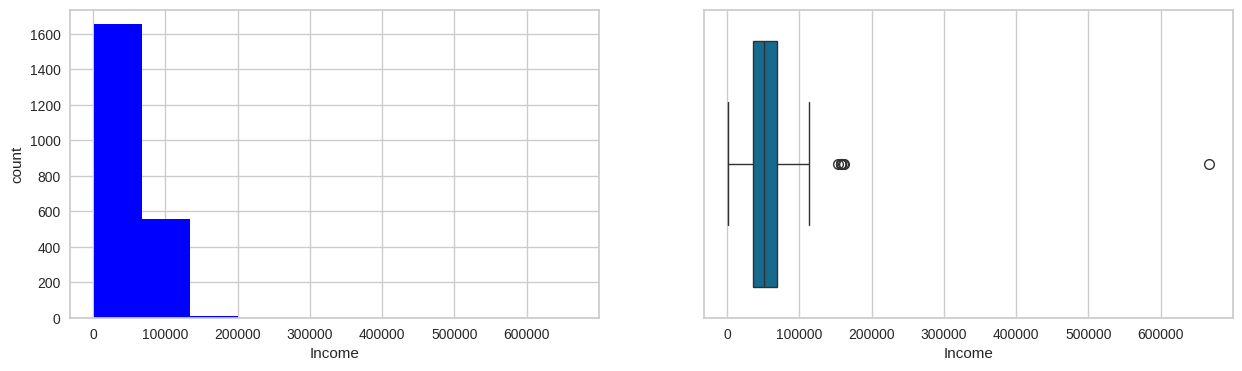

In [14]:
# looking at the Income distribution and boxplot
plt.figure(figsize = (15, 4))
plt.subplot(1, 2, 1)
df["Income"].hist(bins = 10, color = "blue")
plt.xlabel('Income')
plt.ylabel('count')

plt.subplot(1, 2, 2)
sns.boxplot(x = df["Income"])
plt.show()

In [15]:
# treating missing values.
df['Income'] = df['Income'].fillna(df['Income'].mean())

Text(0, 0.5, 'count')

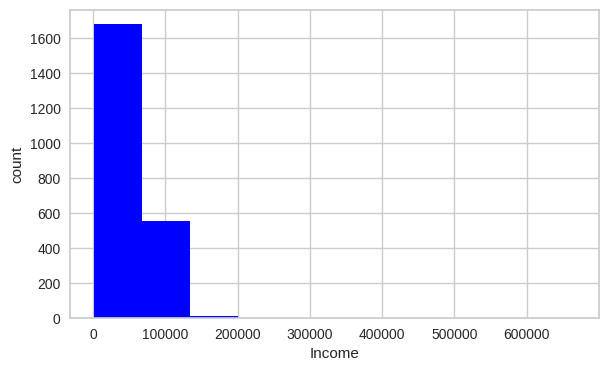

In [16]:
# looking at the Income distribution after inputing missing values
plt.figure(figsize = (15, 4))
plt.subplot(1, 2, 1)
df["Income"].hist(bins = 10, color = "blue")
plt.xlabel('Income')
plt.ylabel('count')

We confirm that the Income distribution hasnt changed after inputing the missing values with the Income mean.

#### **Question 4**: Are there any duplicates in the data?

In [17]:
# checking duplicates
df.duplicated().sum()

np.int64(0)

In [18]:
# checking duplicates
df[df.duplicated()]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response


##### **Observations:**
* There are no duplicate rows in the data. And we can proceed with the EDA.

## **Exploratory Data Analysis**

### Univariate Analysis

#### **Question 5:** Explore all the variables and provide observations on their distributions. (histograms and boxplots)

In [19]:
# columns to show with bars
bar_cols = ["Complain","AcceptedCmp1","AcceptedCmp2","AcceptedCmp3","AcceptedCmp4","AcceptedCmp5","Response","Education","Marital_Status"]
# numerical columns not including bar_cols or colu "ID"
num_cols = [col for col in df.columns if col not in bar_cols and col != "ID"]

In [20]:
num_cols

['Year_Birth',
 'Income',
 'Kidhome',
 'Teenhome',
 'Dt_Customer',
 'Recency',
 'MntWines',
 'MntFruits',
 'MntMeatProducts',
 'MntFishProducts',
 'MntSweetProducts',
 'MntGoldProds',
 'NumDealsPurchases',
 'NumWebPurchases',
 'NumCatalogPurchases',
 'NumStorePurchases',
 'NumWebVisitsMonth']

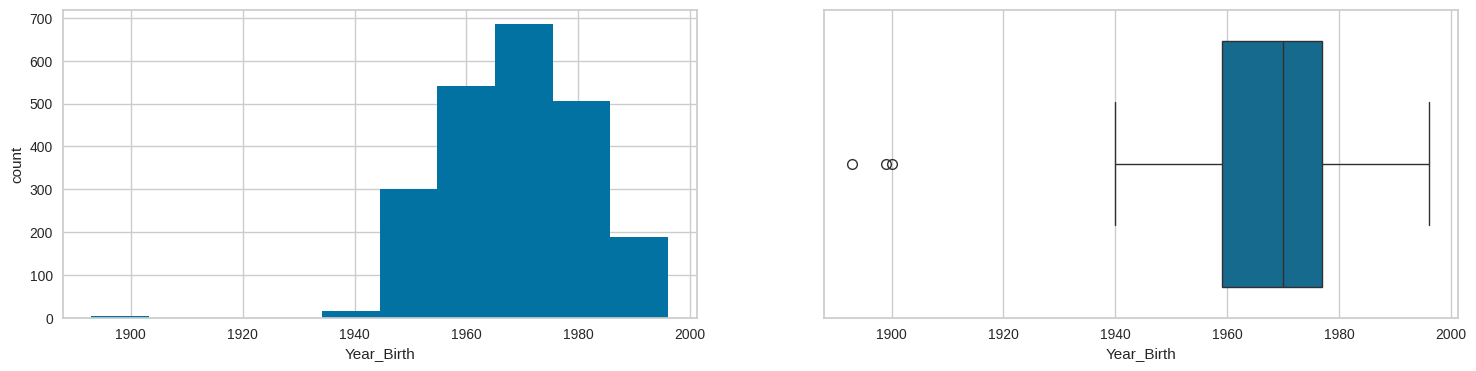

In [21]:
#showing df["Year_Birth"] with a better format
plt.figure(figsize = (18, 4))
plt.subplot(1, 2, 1)
df["Year_Birth"].hist(bins = 10, grid = True)
plt.xlabel("Year_Birth")
plt.ylabel('count')

plt.subplot(1, 2, 2)
sns.boxplot(x = df["Year_Birth"])

plt.show()

In [22]:
#counting how many outliers does Year_Birth have
df[df["Year_Birth"] < 1920].value_counts()

,,,,,,,,,,,,,,,,,,,,,,,,,,,count
ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,
1150,1899,PhD,Together,83532.0,0,0,2013-09-26,36,755,144,562,104,64,224,1,4,6,4,1,0,0,1,0,0,0,0,1
7829,1900,2n Cycle,Divorced,36640.0,1,0,2013-09-26,99,15,6,8,7,4,25,1,2,1,2,5,0,0,0,0,0,1,0,1
11004,1893,2n Cycle,Single,60182.0,0,1,2014-05-17,23,8,0,5,7,0,2,1,1,0,2,4,0,0,0,0,0,0,0,1


##### **Observations:**
There were 3 customers with a date birth before or equal 1900, and their Customer Date was in 2013 and 2014, meaning those customers should have more than 100 year, since those are only 3 outliers, we will proceed to drop them from the dataset.

In [23]:
#dropping Year_Birth outliers
df = df.drop(df[df["Year_Birth"] < 1920].index)


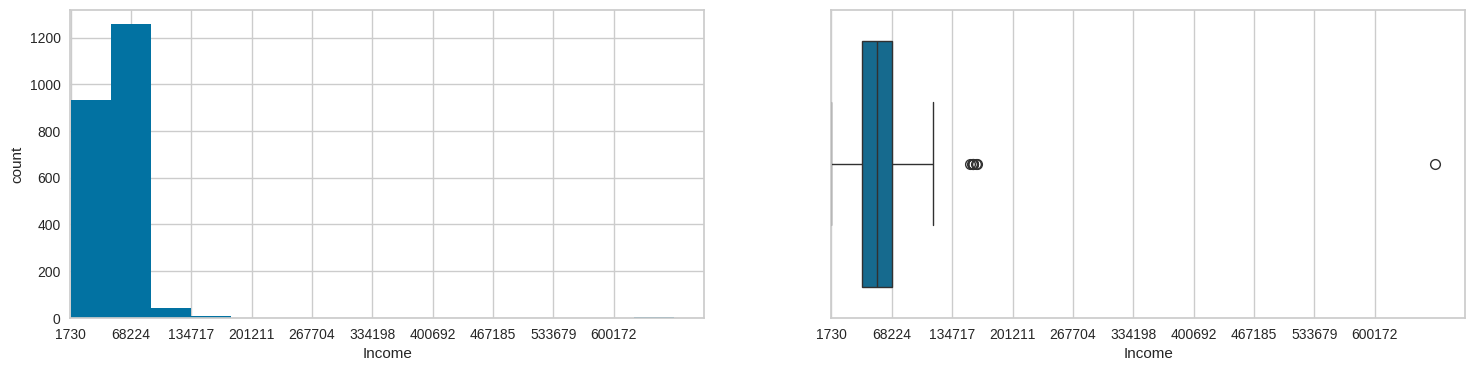

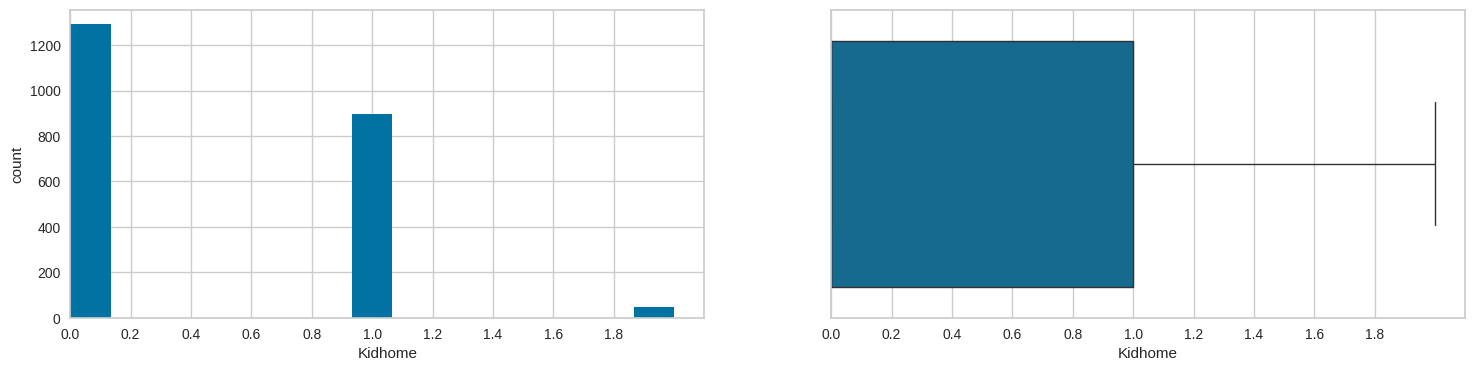

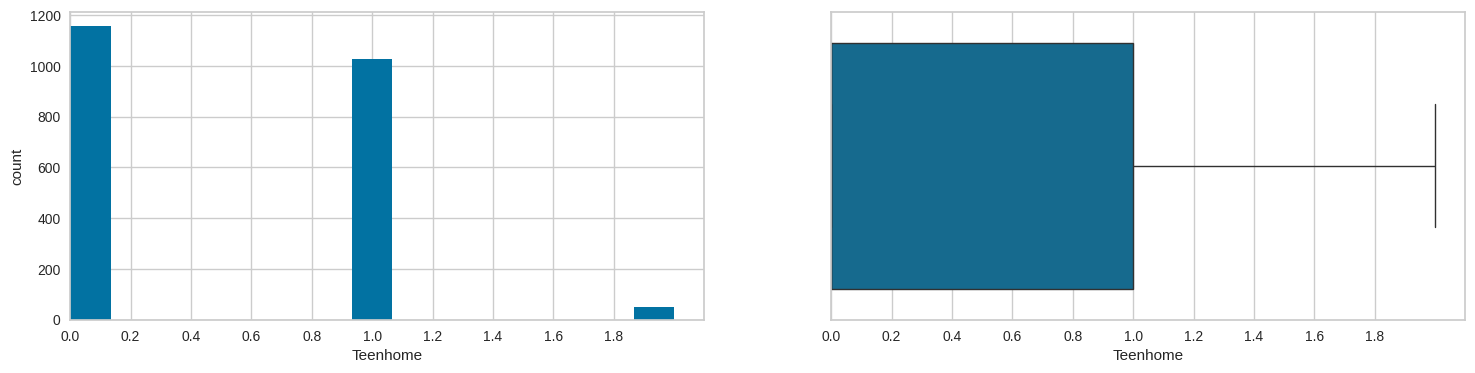

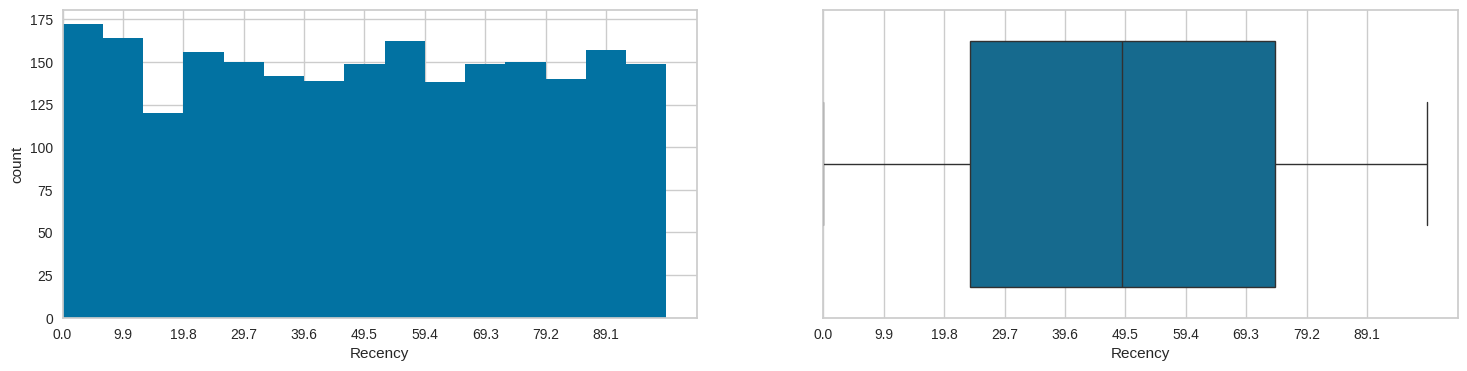

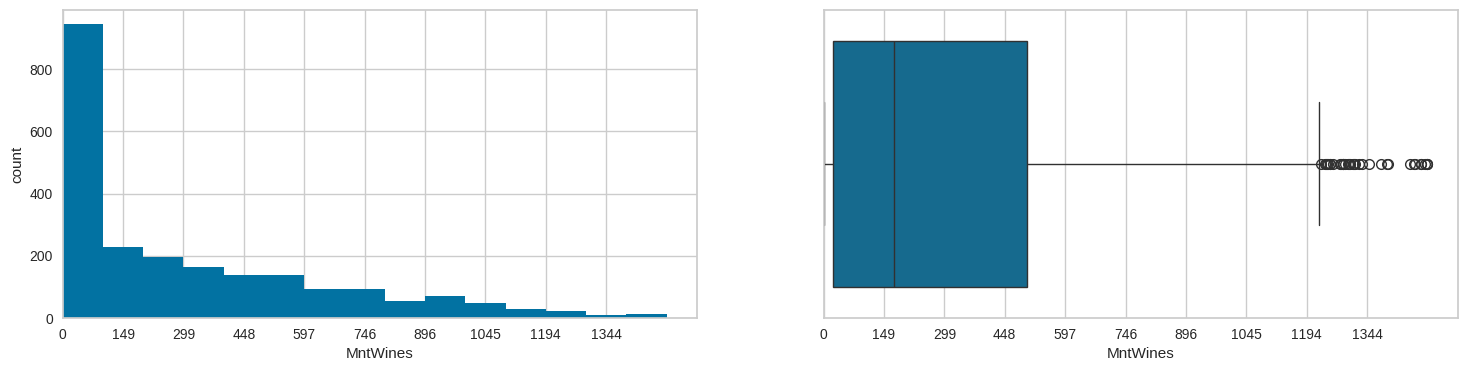

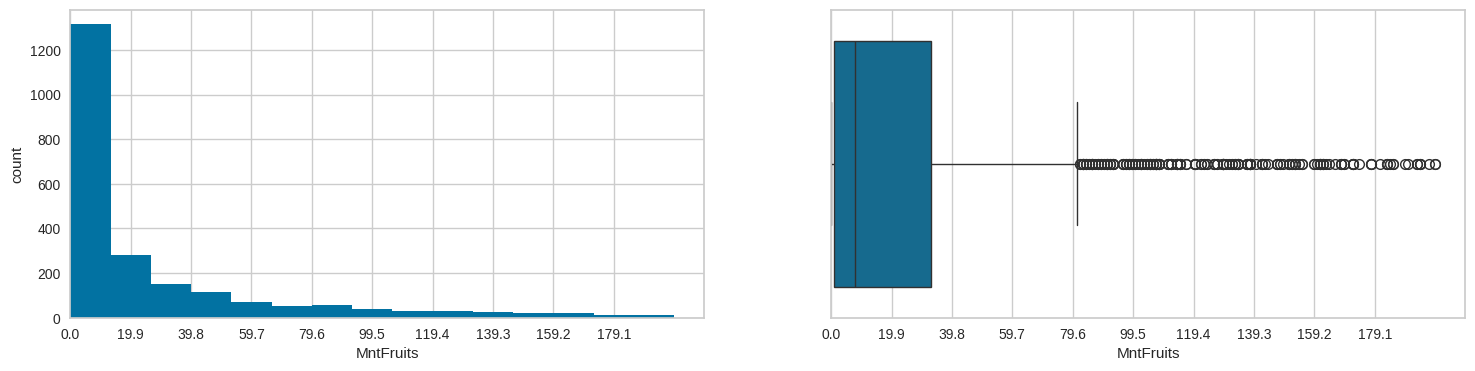

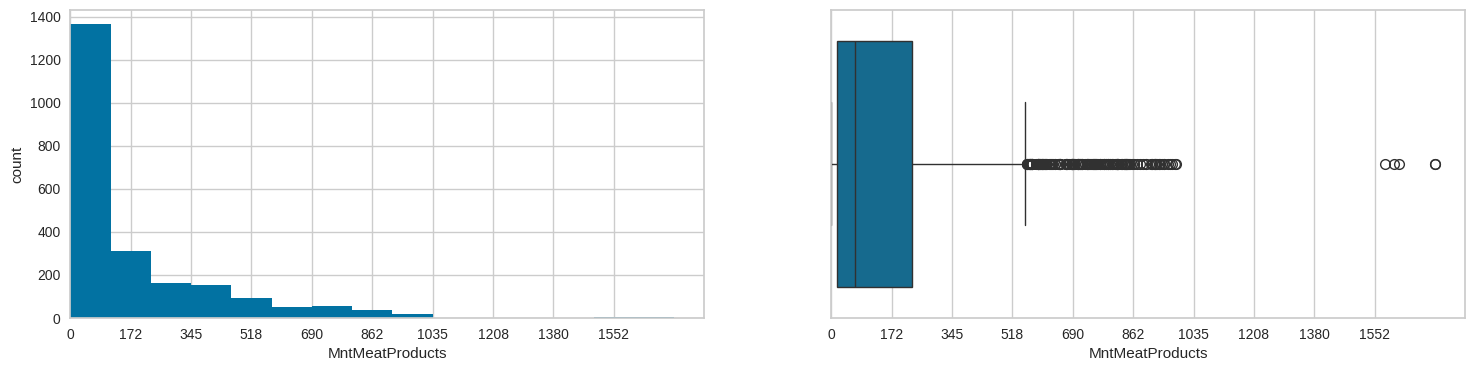

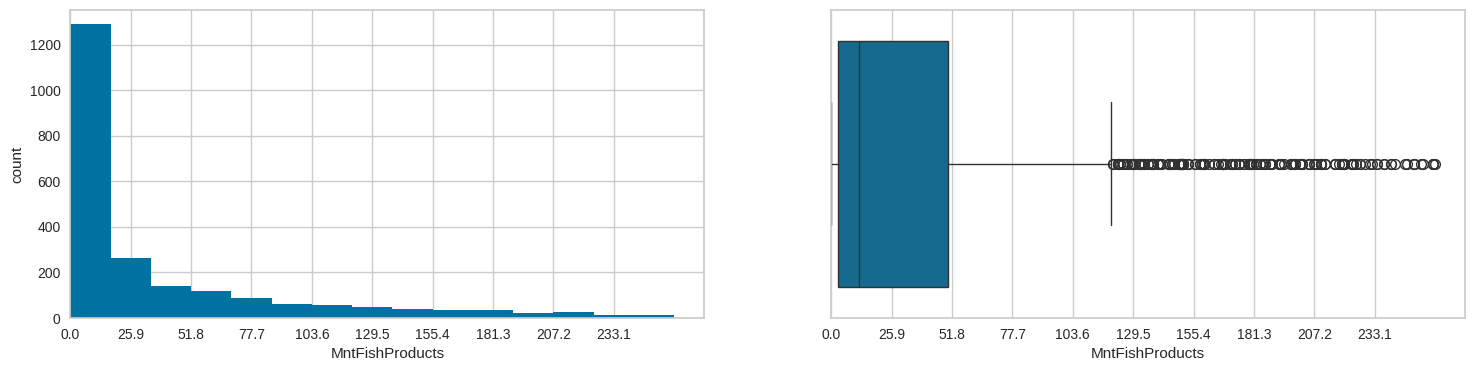

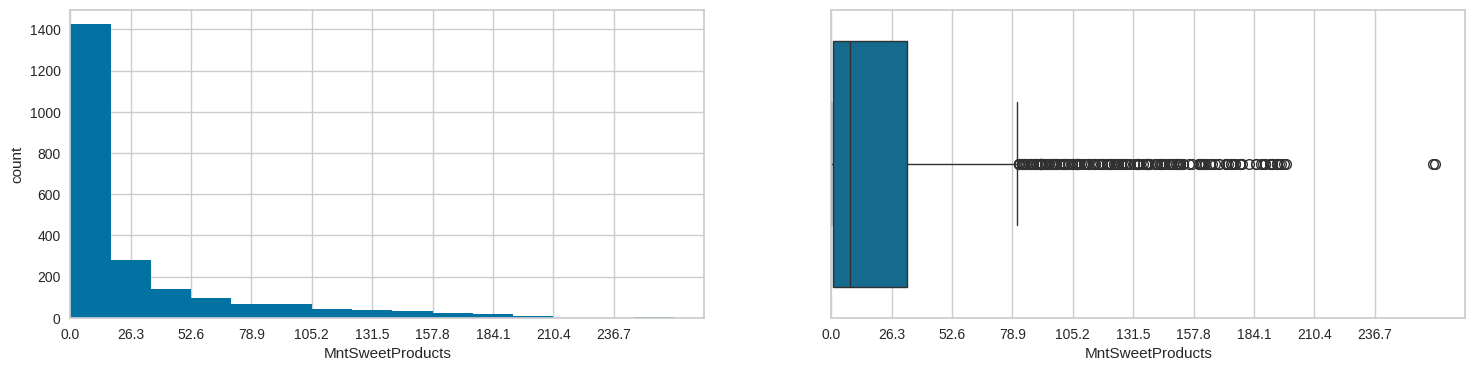

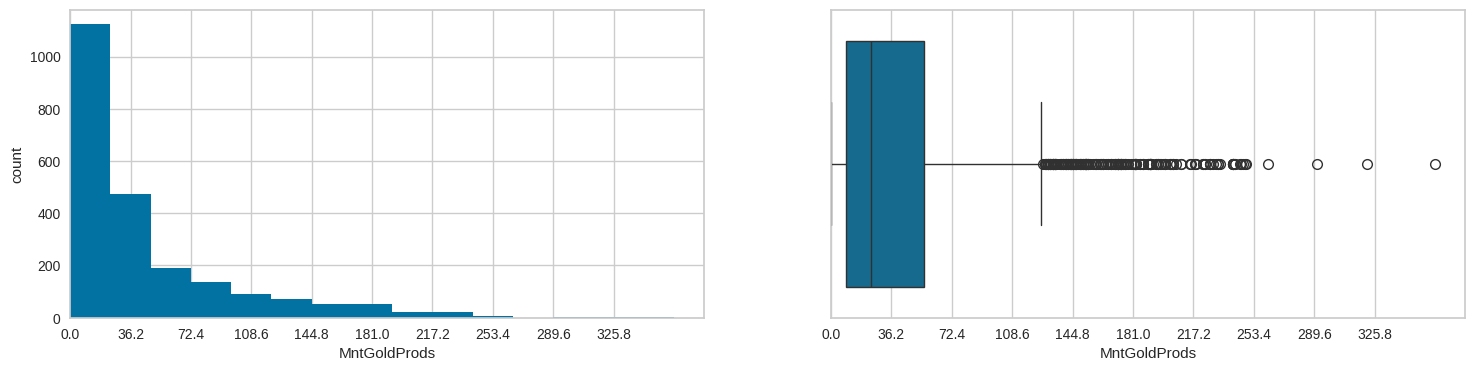

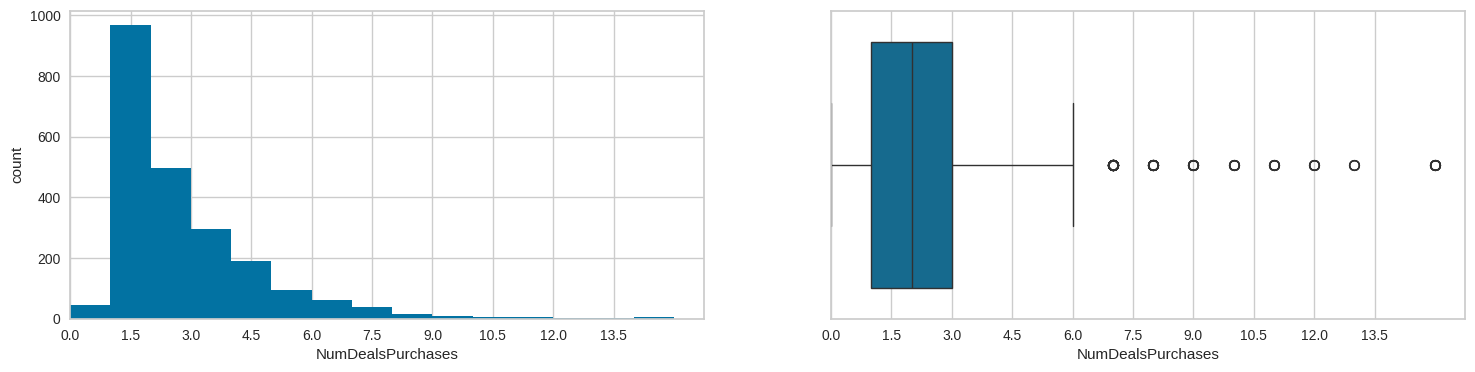

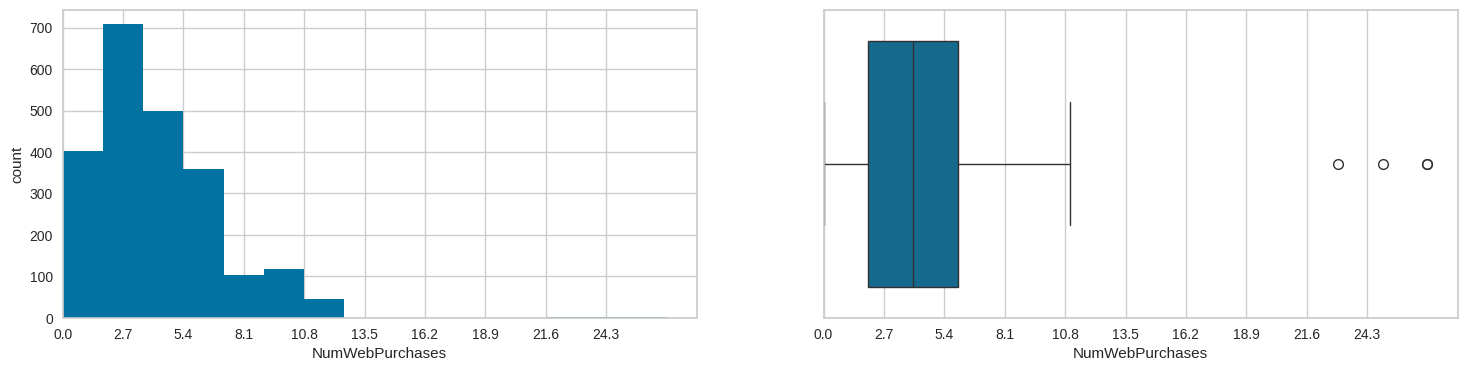

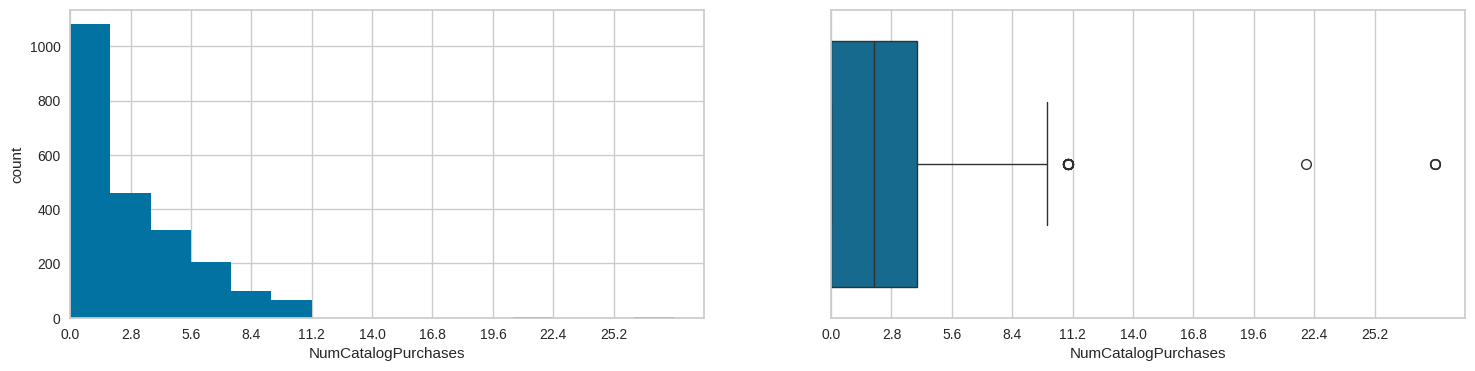

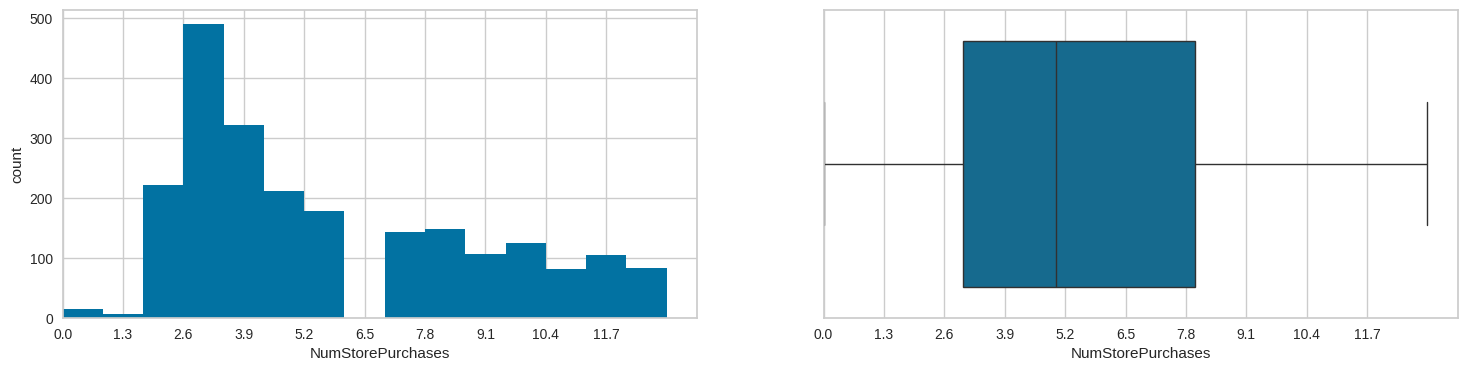

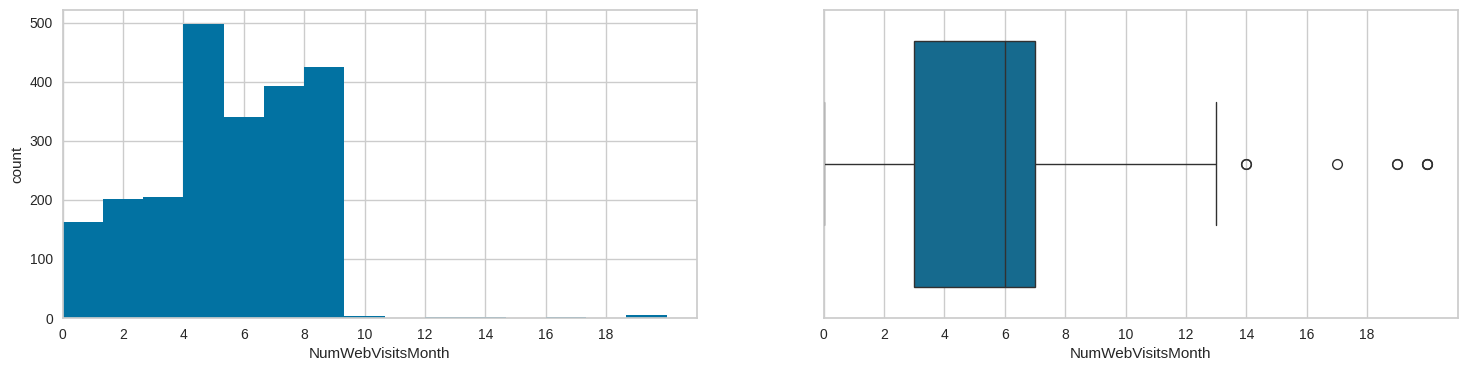

In [24]:
# Exploring all the numerical variables and their distributions (excluding bar_cols)
for col in num_cols[1:]:
  if df[col].dtype != 'datetime64[ns]':
    plt.figure(figsize = (18, 4))
    plt.subplot(1, 2, 1)
    df[col].hist(bins = 15, grid = True)
    plt.xlabel(col)
    plt.ylabel('count')
    plt.xlim(df[col].min() * 0.85, df[col].max() * 1.05)

    step = (df[col].max() - df[col].min()) / 10
    plt.xticks(np.arange(df[col].min(), df[col].max(), step))

    plt.subplot(1, 2, 2)
    sns.boxplot(x = df[col])
    plt.xlim(df[col].min() * 0.85, df[col].max() * 1.05)
    plt.xticks(np.arange(df[col].min(), df[col].max(), step))

    plt.show()

In [25]:
def labeled_barplot(df, feature, perc=True):
  total = len(df[feature])
  plt.figure(figsize=(9, 4))

  plt.xticks(rotation=90, fontsize=15)
  ax = sns.countplot(data=df, x=feature, palette="Paired", order=df[feature].value_counts().index)

  for p in ax.patches:
    if perc == True:
      # percentage of each class of the category
      label = "{:.1f}%".format(100 * p.get_height() / total)
    else:
      label = p.get_height()

    x = p.get_x() + p.get_width() / 2  # width of the plot
    y = p.get_height()  # height

    ax.annotate(
        label,
        (x, y),
        ha="center",
        va="center",
        size=12,
        xytext=(0, 5),
        textcoords="offset points",
    )

  plt.show() # Removed redundant if condition and code block

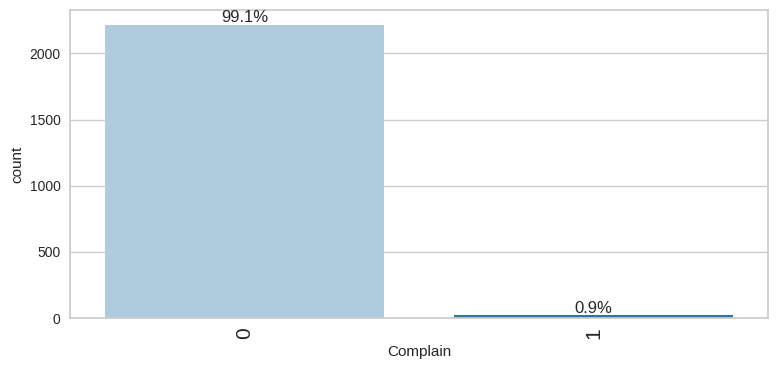

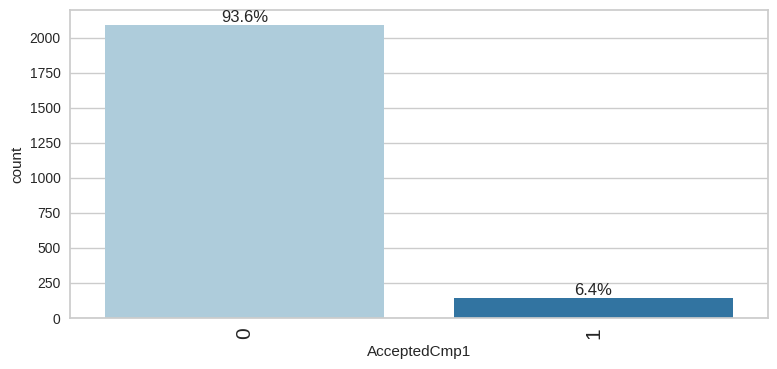

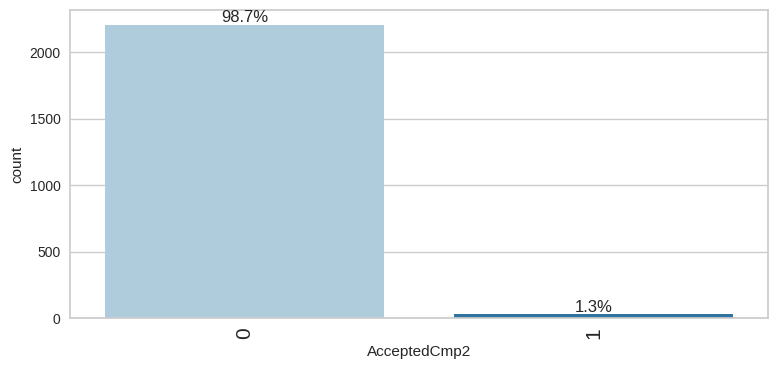

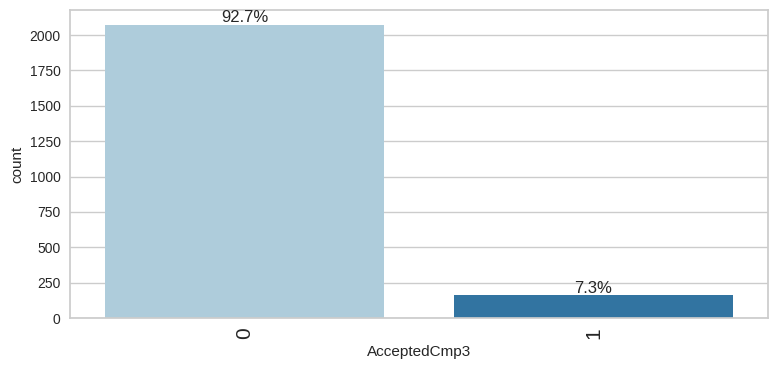

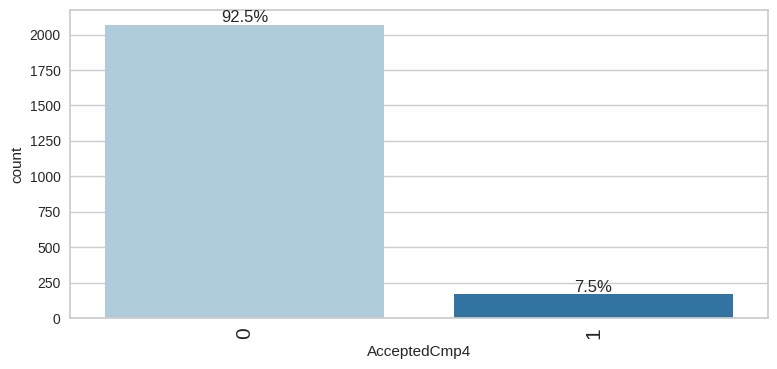

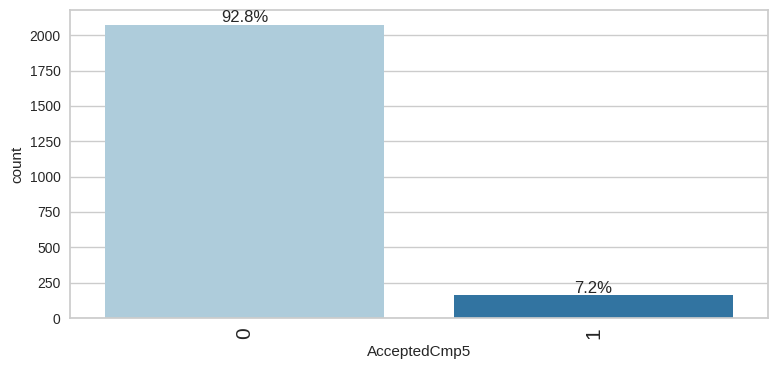

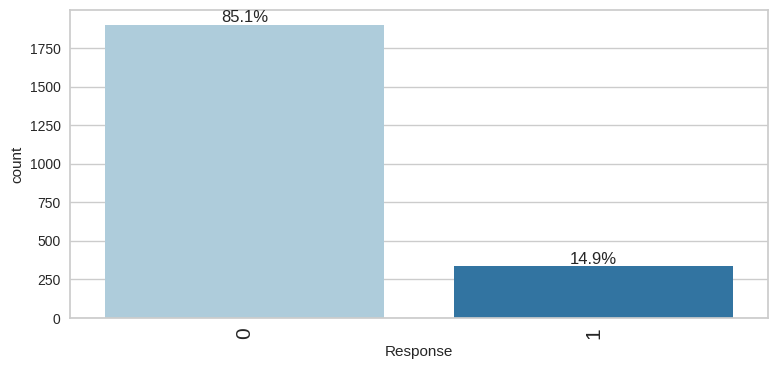

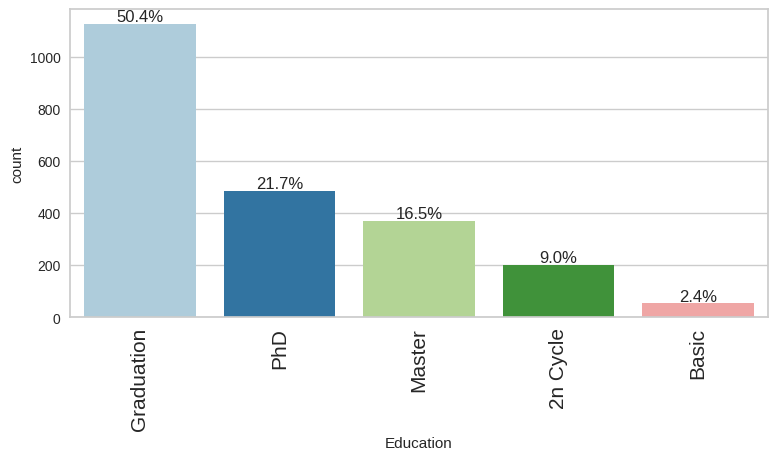

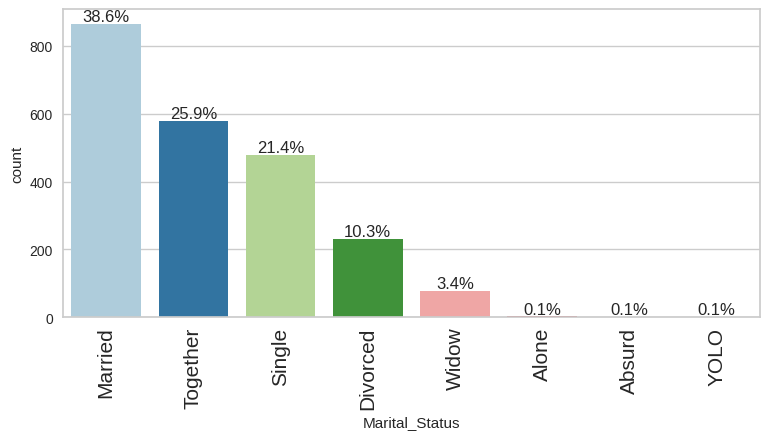

In [26]:
# Exploring all the bar_cols variables and their distributions
for col in bar_cols:
  labeled_barplot( df, col, perc = True )

##### **Observations:**
* For Kidhome and Teenhome, most customers have 0 children at home, followed by 1 child, and the fewest have 2 children.

* Recency shows a uniform distribution, indicating that purchases are made consistently over time without clear seasonal trends.

* All spending amounts (on different products) are right-skewed, with acceptable outliers. This suggests that while most customers spend moderate amounts, some are willing to pay much higher prices, possibly for organic or limited-edition products.

* On average, customers have used 2.3 discount codes, with some customers using up to 14 discounts.

* Customers make an average of 4 web purchases. This is reasonable, as some people may prefer not to shop online or may be unfamiliar with the process.

* Most customers have made few purchases through the catalog, with an average of 2.6 purchases. This could be due to a lack of awareness about the catalog or unfamiliarity with how to use it.

* In contrast to catalog and web purchases, store purchases show a higher average of 5.7 purchases. This is expected, as in-person shopping remains the most traditional and common purchasing method.

* Monthly web visits are left-skewed, with an average of 5.3 visits per month. This suggests that customers are relatively engaged with the company's website.

* 99.1% of customers have not filed any complaints in the past two years. This suggests a high level of satisfaction with the company's products and services.

* Between 92.5% and 98.7% of customers have not accepted any of the marketing campaigns. This may indicate that the current campaigns are either not compelling enough or not effectively targeting the right customer segments. It would be valuable to perform customer segmentation through clustering to design more tailored campaigns and evaluate whether campaign response rates improve.

* 50.4% of customers are college graduates, followed by 21.7% with a PhD, 16.5% with a Masters degree, and 2.4% with only basic education. This insight suggests an opportunity to design targeted campaigns focused on the highly educated customer base.

* 64.5% of customers are either married or living together, while 21.4% are single, 10.3% are divorced, and 3.4% are widowed. These relationship segments could also be leveraged to develop customized marketing campaigns that better align with the different customer life stages.



### Bivariate Analysis

#### **Question 6:** Perform multivariate analysis to explore the relationships between the variables.

In [27]:
# looking at correlation matrix
# Select only numerical features for correlation analysis
num_features = df.select_dtypes(include=np.number)
num_features.drop('ID', axis=1, inplace=True)
# Calculate the correlation matrix
num_features.corr()

,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
Year_Birth,1.000000,-0.162393,0.234133,-0.363350,-0.019670,-0.163035,-0.013751,-0.030927,-0.042519,-0.019571,-0.057599,-0.067999,-0.153973,-0.125439,-0.139465,0.117570,0.061013,-0.064341,0.015322,-0.008227,-0.007657,-0.004479,0.018424
Income,-0.162393,1.000000,-0.424736,0.019170,-0.003091,0.576617,0.428148,0.577521,0.437147,0.435949,0.321122,-0.082064,0.380843,0.586649,0.527235,-0.549469,-0.016058,0.183004,0.333936,0.275170,0.087628,-0.024902,0.133010
Kidhome,0.234133,-0.424736,1.000000,-0.035753,0.007544,-0.496367,-0.372488,-0.437059,-0.387536,-0.370656,-0.349633,0.221799,-0.362063,-0.502438,-0.500387,0.447641,0.014606,-0.161775,-0.204994,-0.172512,-0.081794,0.036283,-0.080176
Teenhome,-0.363350,0.019170,-0.035753,1.000000,0.017115,0.005409,-0.175951,-0.260820,-0.203900,-0.162218,-0.020186,0.387792,0.155776,-0.110285,0.050517,0.134491,-0.042823,0.038790,-0.190227,-0.140288,-0.015664,0.007591,-0.154730
Recency,-0.019670,-0.003091,0.007544,0.017115,1.000000,0.016668,-0.003592,0.023705,0.001532,0.023045,0.017412,-0.000987,-0.010616,0.025449,0.001117,-0.021959,-0.032976,0.018890,0.000956,-0.019258,-0.001764,0.005398,-0.198568
MntWines,-0.163035,0.576617,-0.496367,0.005409,0.016668,1.000000,0.388518,0.561993,0.399073,0.385992,0.386376,0.010829,0.542177,0.634784,0.642433,-0.320337,0.062201,0.373532,0.471969,0.354365,0.206040,-0.035930,0.247392
MntFruits,-0.013751,0.428148,-0.372488,-0.175951,-0.003592,0.388518,1.000000,0.542057,0.594438,0.567054,0.390042,-0.131886,0.297024,0.487307,0.463168,-0.417427,0.014983,0.010402,0.212027,0.195380,-0.009701,-0.002800,0.125904
MntMeatProducts,-0.030927,0.577521,-0.437059,-0.260820,0.023705,0.561993,0.542057,1.000000,0.567880,0.523418,0.348845,-0.122465,0.293579,0.723519,0.480110,-0.539203,0.018331,0.103053,0.372212,0.310096,0.043090,-0.020720,0.236640
MntFishProducts,-0.042519,0.437147,-0.387536,-0.203900,0.001532,0.399073,0.594438,0.567880,1.000000,0.579553,0.422103,-0.139440,0.293489,0.534033,0.460099,-0.445760,0.000370,0.016864,0.198163,0.260908,0.002583,-0.018818,0.111415
MntSweetProducts,-0.019571,0.435949,-0.370656,-0.162218,0.023045,0.385992,0.567054,0.523418,0.579553,1.000000,0.369193,-0.120278,0.348304,0.490497,0.448801,-0.423249,0.001491,0.028612,0.258848,0.241875,0.009972,-0.020404,0.117366


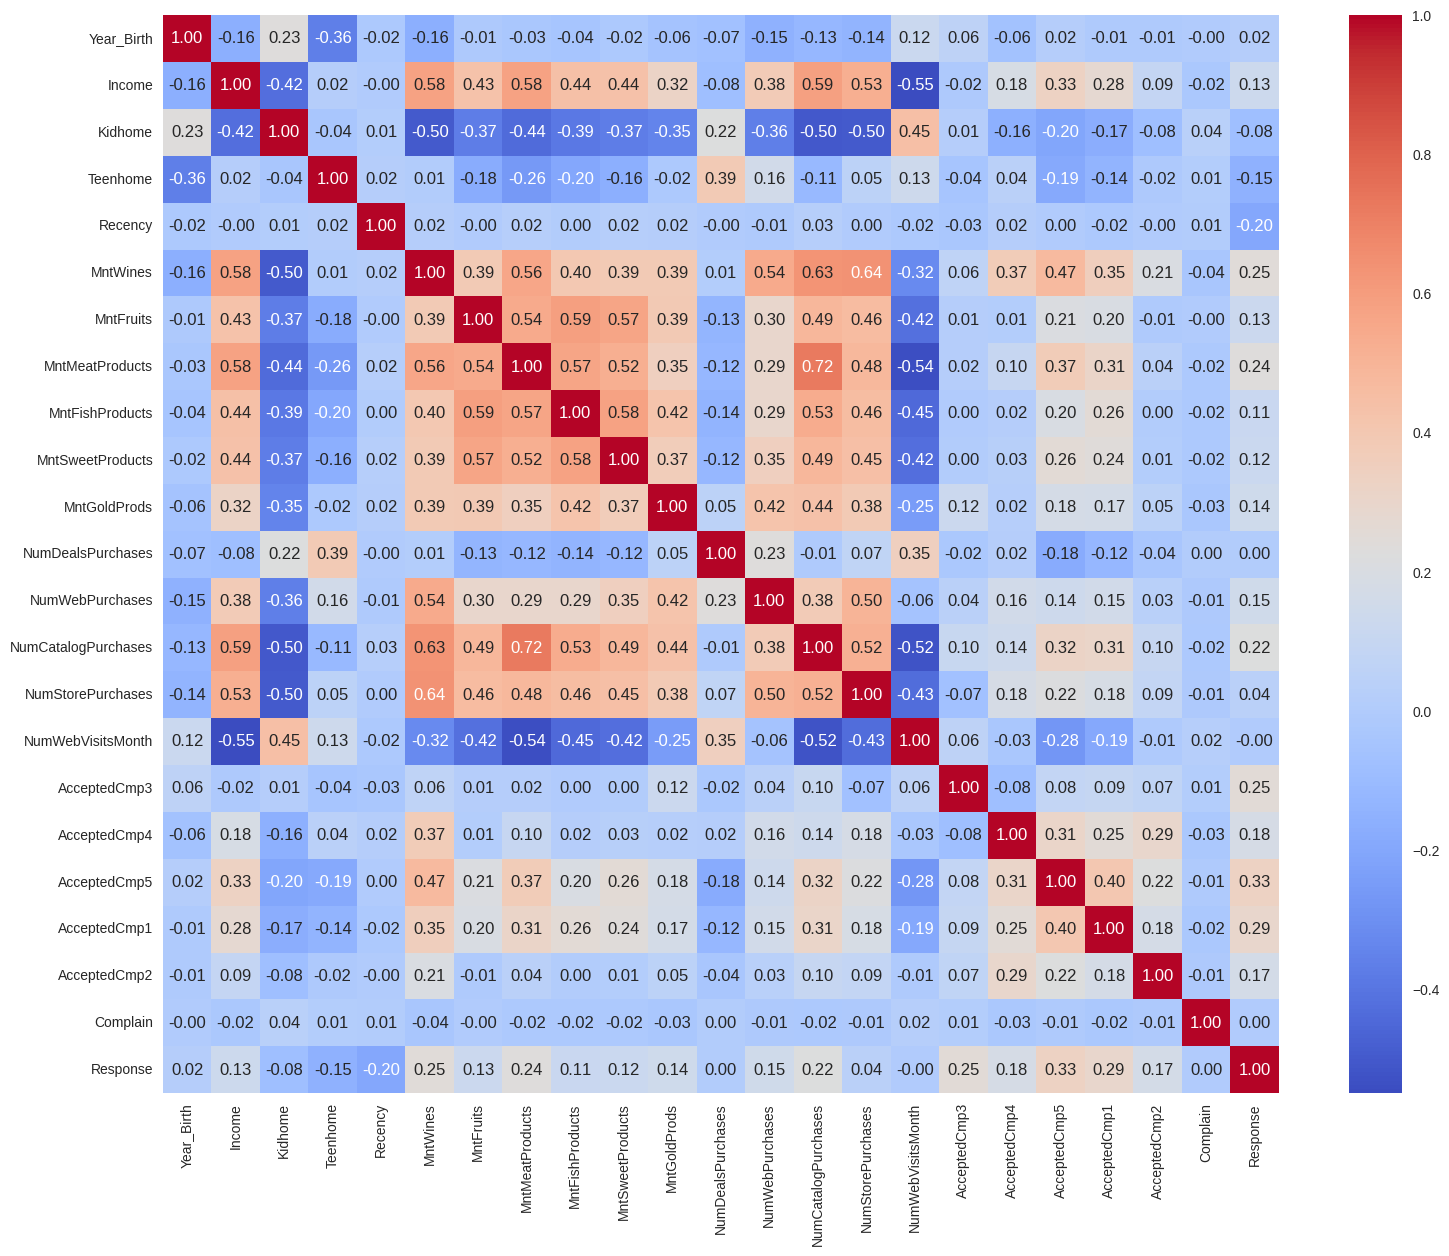

In [28]:
#heatmap
plt.figure(figsize=(18, 14))
sns.heatmap(num_features.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.show()

##### **Observations:**
* Income shows a positive correlation with the amount spent across all product categories, indicating that customers with higher incomes tend to spend more.

- All product categories are positively correlated with each other. This suggests that customers who purchase one type of product are also likely to purchase other types.

* Income is also positively correlated with the number of purchases made through different channels. This means that higher-income customers tend to make more purchases overall.

- Income is negatively correlated with both the number of children at home (Kidhome) and the number of website visits. This may imply that higher-income customers are less likely to have children and visit the website less frequently.

* Kidhome is negatively correlated with the amount spent on products, suggesting that customers with more children tend to spend less.

- Meat product purchases are positively correlated with catalog purchases, indicating that customers may prefer buying meat products through catalogs rather than other purchasing channels.

* Wine purchases are strongly positively correlated with store purchases, suggesting that customers prefer buying wine in physical stores.

## **K-means Clustering**

#### **Question 7** : Select the appropriate number of clusters using the elbow Plot. What do you think is the appropriate number of clusters?

In [29]:
# Dropping id variable, because it doesnt add value to the clustering
df_new = df.drop('ID', axis=1)

In [30]:
# Selecting only numerical features for scaling
nu_features = df_new.select_dtypes(include=np.number).columns
df_scaled_nu = df_new[nu_features]

# Scaling the numerical features and storing the output as a new df
scaler = StandardScaler()
df_scaled_nu = pd.DataFrame(scaler.fit_transform(df_scaled_nu), columns=nu_features, index=df_new.index)

df_scaled_nu.head()

,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,-1.017296,0.235698,-0.825388,-0.930227,0.307272,0.983671,1.554623,1.680253,2.461700,1.475877,0.846061,0.348371,1.408080,2.510435,-0.552077,0.692882,-0.280343,-0.284036,-0.279414,-0.262299,-0.11659,-0.09498,2.386966
1,-1.273722,-0.235355,1.032151,0.906417,-0.383584,-0.870717,-0.636422,-0.713250,-0.650275,-0.631440,-0.729569,-0.169096,-1.110957,-0.568802,-1.167421,-0.131574,-0.280343,-0.284036,-0.279414,-0.262299,-0.11659,-0.09498,-0.418942
2,-0.333495,0.773891,-0.825388,-0.930227,-0.798098,0.362570,0.572430,-0.176928,1.345050,-0.147000,-0.037829,-0.686563,1.408080,-0.226664,1.293956,-0.543802,-0.280343,-0.284036,-0.279414,-0.262299,-0.11659,-0.09498,-0.418942
3,1.290534,-1.022094,1.032151,-0.930227,-0.798098,-0.870717,-0.560868,-0.651196,-0.503829,-0.582996,-0.748784,-0.169096,-0.751094,-0.910939,-0.552077,0.280654,-0.280343,-0.284036,-0.279414,-0.262299,-0.11659,-0.09498,-0.418942
4,1.034108,0.241889,1.032151,-0.930227,1.550812,-0.389289,0.421324,-0.216820,0.155177,-0.001667,-0.556634,1.383304,0.328493,0.115473,0.063267,-0.131574,-0.280343,-0.284036,-0.279414,-0.262299,-0.11659,-0.09498,-0.418942


In [31]:
# Creating copy of the data to store labels from each algorithm
df_scaled_nu_copy = df_scaled_nu.copy(deep = True)

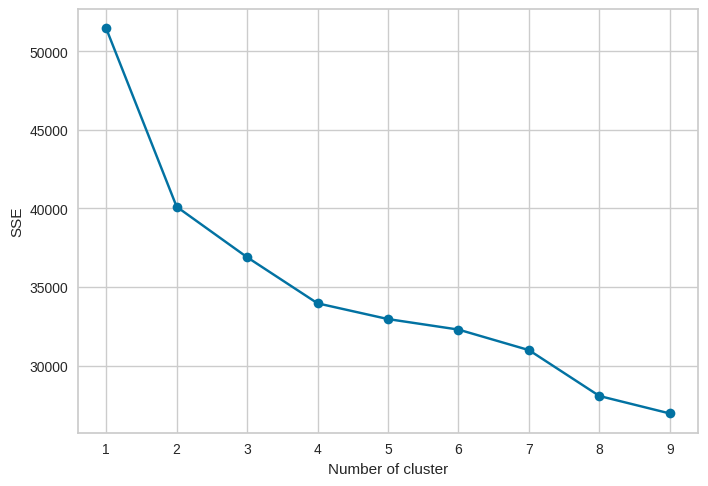

In [32]:
# Empty dictionary to store the SSE for each value of K
sse = {}

# Iterate for a range of Ks and fit the scaled data to the algorithm.
# Use inertia attribute from the clustering object and store the inertia value for that K
for k in range(1, 10):
    kmeans = KMeans(n_clusters = k, random_state = 1).fit(df_scaled_nu)

    sse[k] = kmeans.inertia_

# Elbow plot
plt.figure()

plt.plot(list(sse.keys()), list(sse.values()), '-bo')

plt.xlabel("Number of cluster")

plt.ylabel("SSE")

plt.show()

##### **Observations:**
- There’s a consistent decrease from 2 to 8 clusters, but there’s no really clear "elbow" point. We could probably pick any number of clusters between 2 and 8. Recommending to use 2.

- To double-check, let’s also plot the Silhouette scores and see how they change with K.

#### **Question 8** : finalize appropriate number of clusters by checking the silhoutte score as well. Is the answer different from the elbow plot?

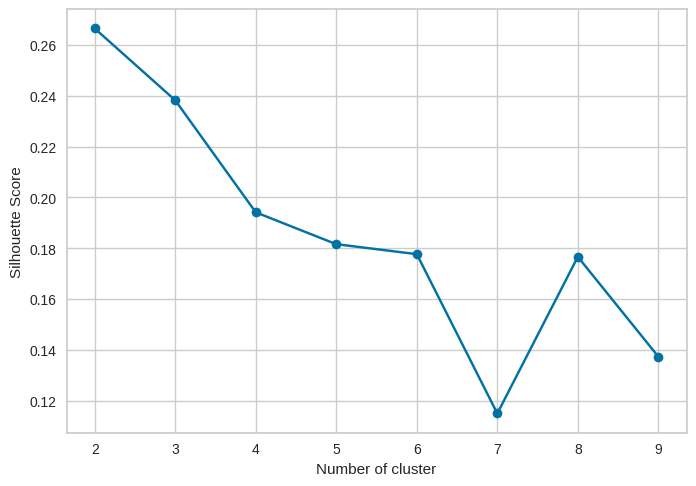

In [33]:
# Silhouette score empty dictionary
sc = {}

# Iterate for a range of Ks and fit the scaled data to the algorithm. Store the Silhouette score for that K
for k in range(2, 10):
    kmeans = KMeans(n_clusters = k, random_state = 1).fit(df_scaled_nu)

    labels = kmeans.predict(df_scaled_nu)

    sc[k] = silhouette_score(df_scaled_nu, labels)

# Elbow plot
plt.figure()

plt.plot(list(sc.keys()), list(sc.values()), "-bo")

plt.xlabel("Number of cluster")

plt.ylabel("Silhouette Score")

plt.show()

##### **Observations:**
- We can observe from the plot that 2 Clusters have the highest silhouette score , same as our previews recomendation.

#### **Question 9**: Do a final fit with the appropriate number of clusters. How much total time does it take for the model to fit the data?

In [34]:
#importing time
import time

In [35]:
# Start timer
start_time = time.time()

# Fit the model
kmeans = KMeans(n_clusters=2, random_state=1)
kmeans.fit(df_scaled_nu)

# End timer
end_time = time.time()


total_time = end_time - start_time
print(f"Total time to fit the model: {total_time:.4f} seconds")

Total time to fit the model: 0.0087 seconds


##### **Observations:**
* The model takes 0.008 seconds to fit the model with 2 clusters.


## **Cluster Profiling and Comparison**

#### **Question 10**: Perform cluster profiling using boxplots for the K-Means algorithm. Analyze key characteristics of each cluster and provide detailed observations.

In [36]:
# Adding predicted labels to  the scaled and original data
df_kmeans = df_scaled_nu_copy.copy()
df_kmeans['clusters'] = kmeans.predict(df_scaled_nu)


df_kmeans.head()

,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,clusters
0,-1.017296,0.235698,-0.825388,-0.930227,0.307272,0.983671,1.554623,1.680253,2.461700,1.475877,0.846061,0.348371,1.408080,2.510435,-0.552077,0.692882,-0.280343,-0.284036,-0.279414,-0.262299,-0.11659,-0.09498,2.386966,1
1,-1.273722,-0.235355,1.032151,0.906417,-0.383584,-0.870717,-0.636422,-0.713250,-0.650275,-0.631440,-0.729569,-0.169096,-1.110957,-0.568802,-1.167421,-0.131574,-0.280343,-0.284036,-0.279414,-0.262299,-0.11659,-0.09498,-0.418942,0
2,-0.333495,0.773891,-0.825388,-0.930227,-0.798098,0.362570,0.572430,-0.176928,1.345050,-0.147000,-0.037829,-0.686563,1.408080,-0.226664,1.293956,-0.543802,-0.280343,-0.284036,-0.279414,-0.262299,-0.11659,-0.09498,-0.418942,1
3,1.290534,-1.022094,1.032151,-0.930227,-0.798098,-0.870717,-0.560868,-0.651196,-0.503829,-0.582996,-0.748784,-0.169096,-0.751094,-0.910939,-0.552077,0.280654,-0.280343,-0.284036,-0.279414,-0.262299,-0.11659,-0.09498,-0.418942,0
4,1.034108,0.241889,1.032151,-0.930227,1.550812,-0.389289,0.421324,-0.216820,0.155177,-0.001667,-0.556634,1.383304,0.328493,0.115473,0.063267,-0.131574,-0.280343,-0.284036,-0.279414,-0.262299,-0.11659,-0.09498,-0.418942,0


In [37]:
#cluster profile, grouping per cluster
clusters_kmean = df_kmeans.groupby("clusters").mean()
clusters_kmean["count"] = df_kmeans.groupby("clusters")["Income"].count().values
clusters_kmean.style.highlight_max( color = "green")

,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,count
clusters,,,,,,,,,,,,,,,,,,,,,,,,
0,0.097152,-0.516502,0.453976,0.098240,-0.008926,-0.582805,-0.490059,-0.570503,-0.504893,-0.489031,-0.404568,0.112293,-0.395733,-0.600019,-0.550945,0.443240,-0.022717,-0.144053,-0.279414,-0.241311,-0.103795,0.006643,-0.154662,1359
1,-0.150375,0.799460,-0.702681,-0.152059,0.013815,0.902086,0.758531,0.883045,0.781492,0.756940,0.626205,-0.173811,0.612530,0.928732,0.852772,-0.686062,0.035162,0.222971,0.432487,0.373509,0.160658,-0.010282,0.239392,878


In [38]:
nu_features.shape[0]

23

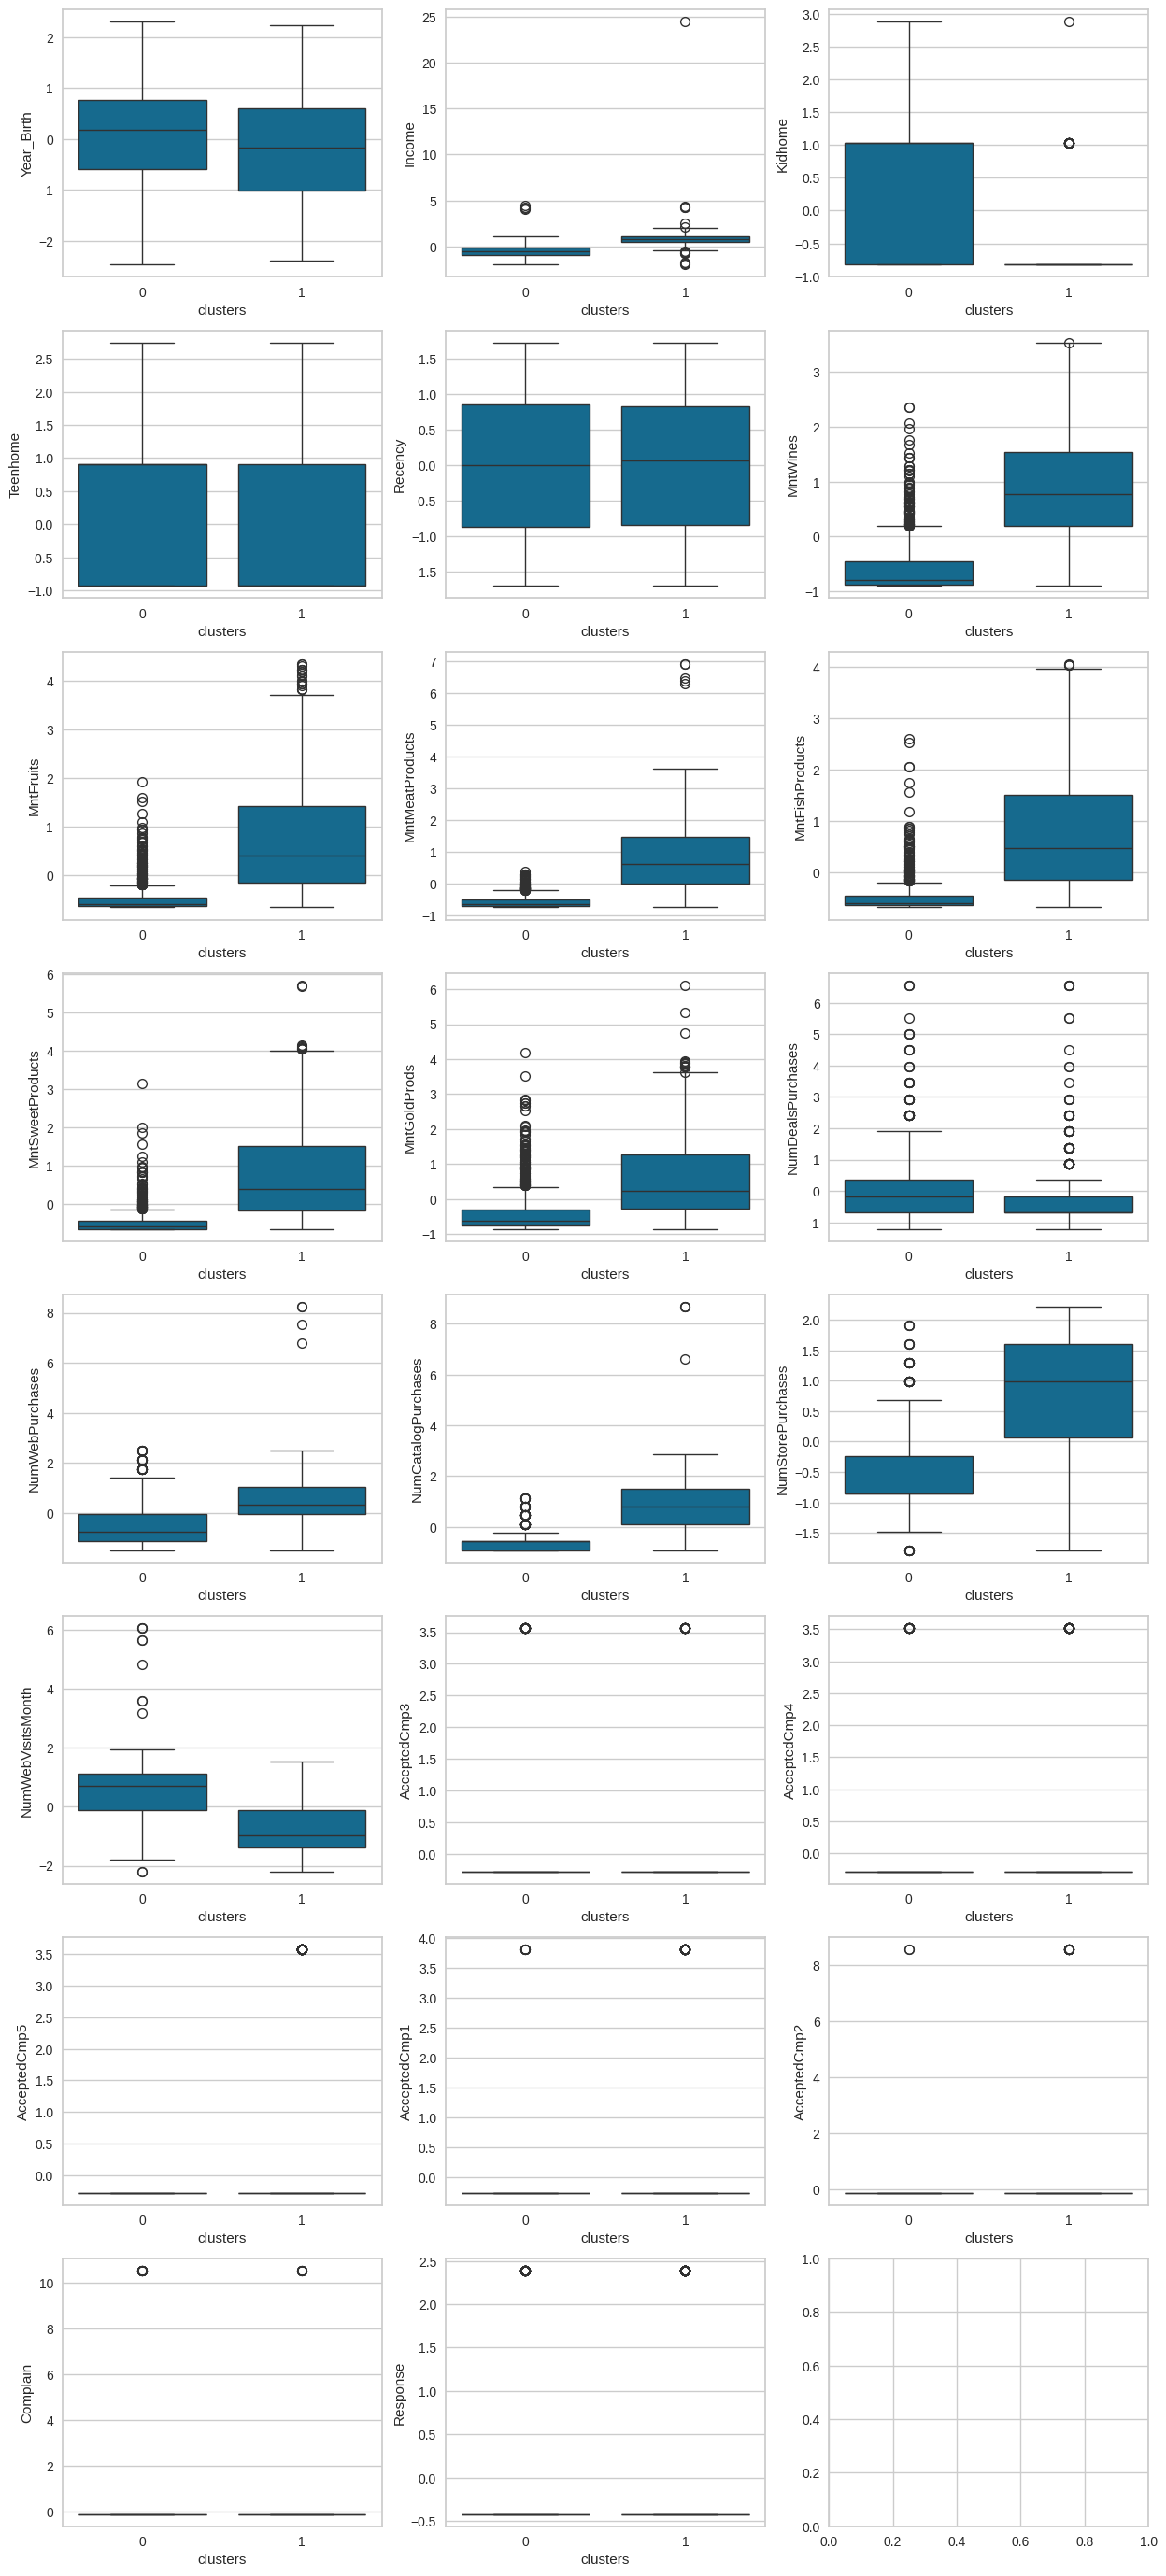

In [39]:
fig, ax = plt.subplots(8, 3, figsize=(15, 35))
# Calculating the number of subplots needed
num_subplots = min(len(nu_features), 8 * 3)

for index, feature in enumerate(nu_features):
    if index < num_subplots:
        row = index // 3
        col = index % 3
        sns.boxplot(data=df_kmeans, x="clusters", y=feature, ax=ax[row][col])

##### **Observations:**
- **Age Range:**
Both clusters include customers with a similar range of birth years, meaning age does not play a strong differentiating role between the groups.

- **Cluster 1** – Higher Income, Fewer Kids:
Customers in this group have a higher income and typically no children. This likely explains their higher spending across all product categories. With fewer financial responsibilities, they have greater flexibility to spend. Even when they do have children, their financial situation still allows for discretionary spending.

- **Cluster 0** – Lower Income, Cost-Conscious Behavior:
This group earns less and tends to use discount codes more often and visit the website more frequently. These behaviors suggest a more budget-conscious approach, aiming to maximize value. Despite this, they make fewer purchases overall across all channels compared to Cluster 1.

#### **Question 11**: Perform cluster profiling on the data using a barplot for the K-Means algorithm. Provide insights and key observations for each cluster based on the visual analysis.

In [40]:
#Removing count from the features
clusters_kmean = clusters_kmean.drop('count', axis=1)

In [41]:
#Unscaling data to get data values for the profiles
numerical_features = df_kmeans.drop(columns=['clusters'])

df_unscaled = pd.DataFrame(scaler.inverse_transform(numerical_features),
                           columns=numerical_features.columns,
                           index=numerical_features.index)  # Preserve original index

df_unscaled['cluster'] = kmeans.labels_

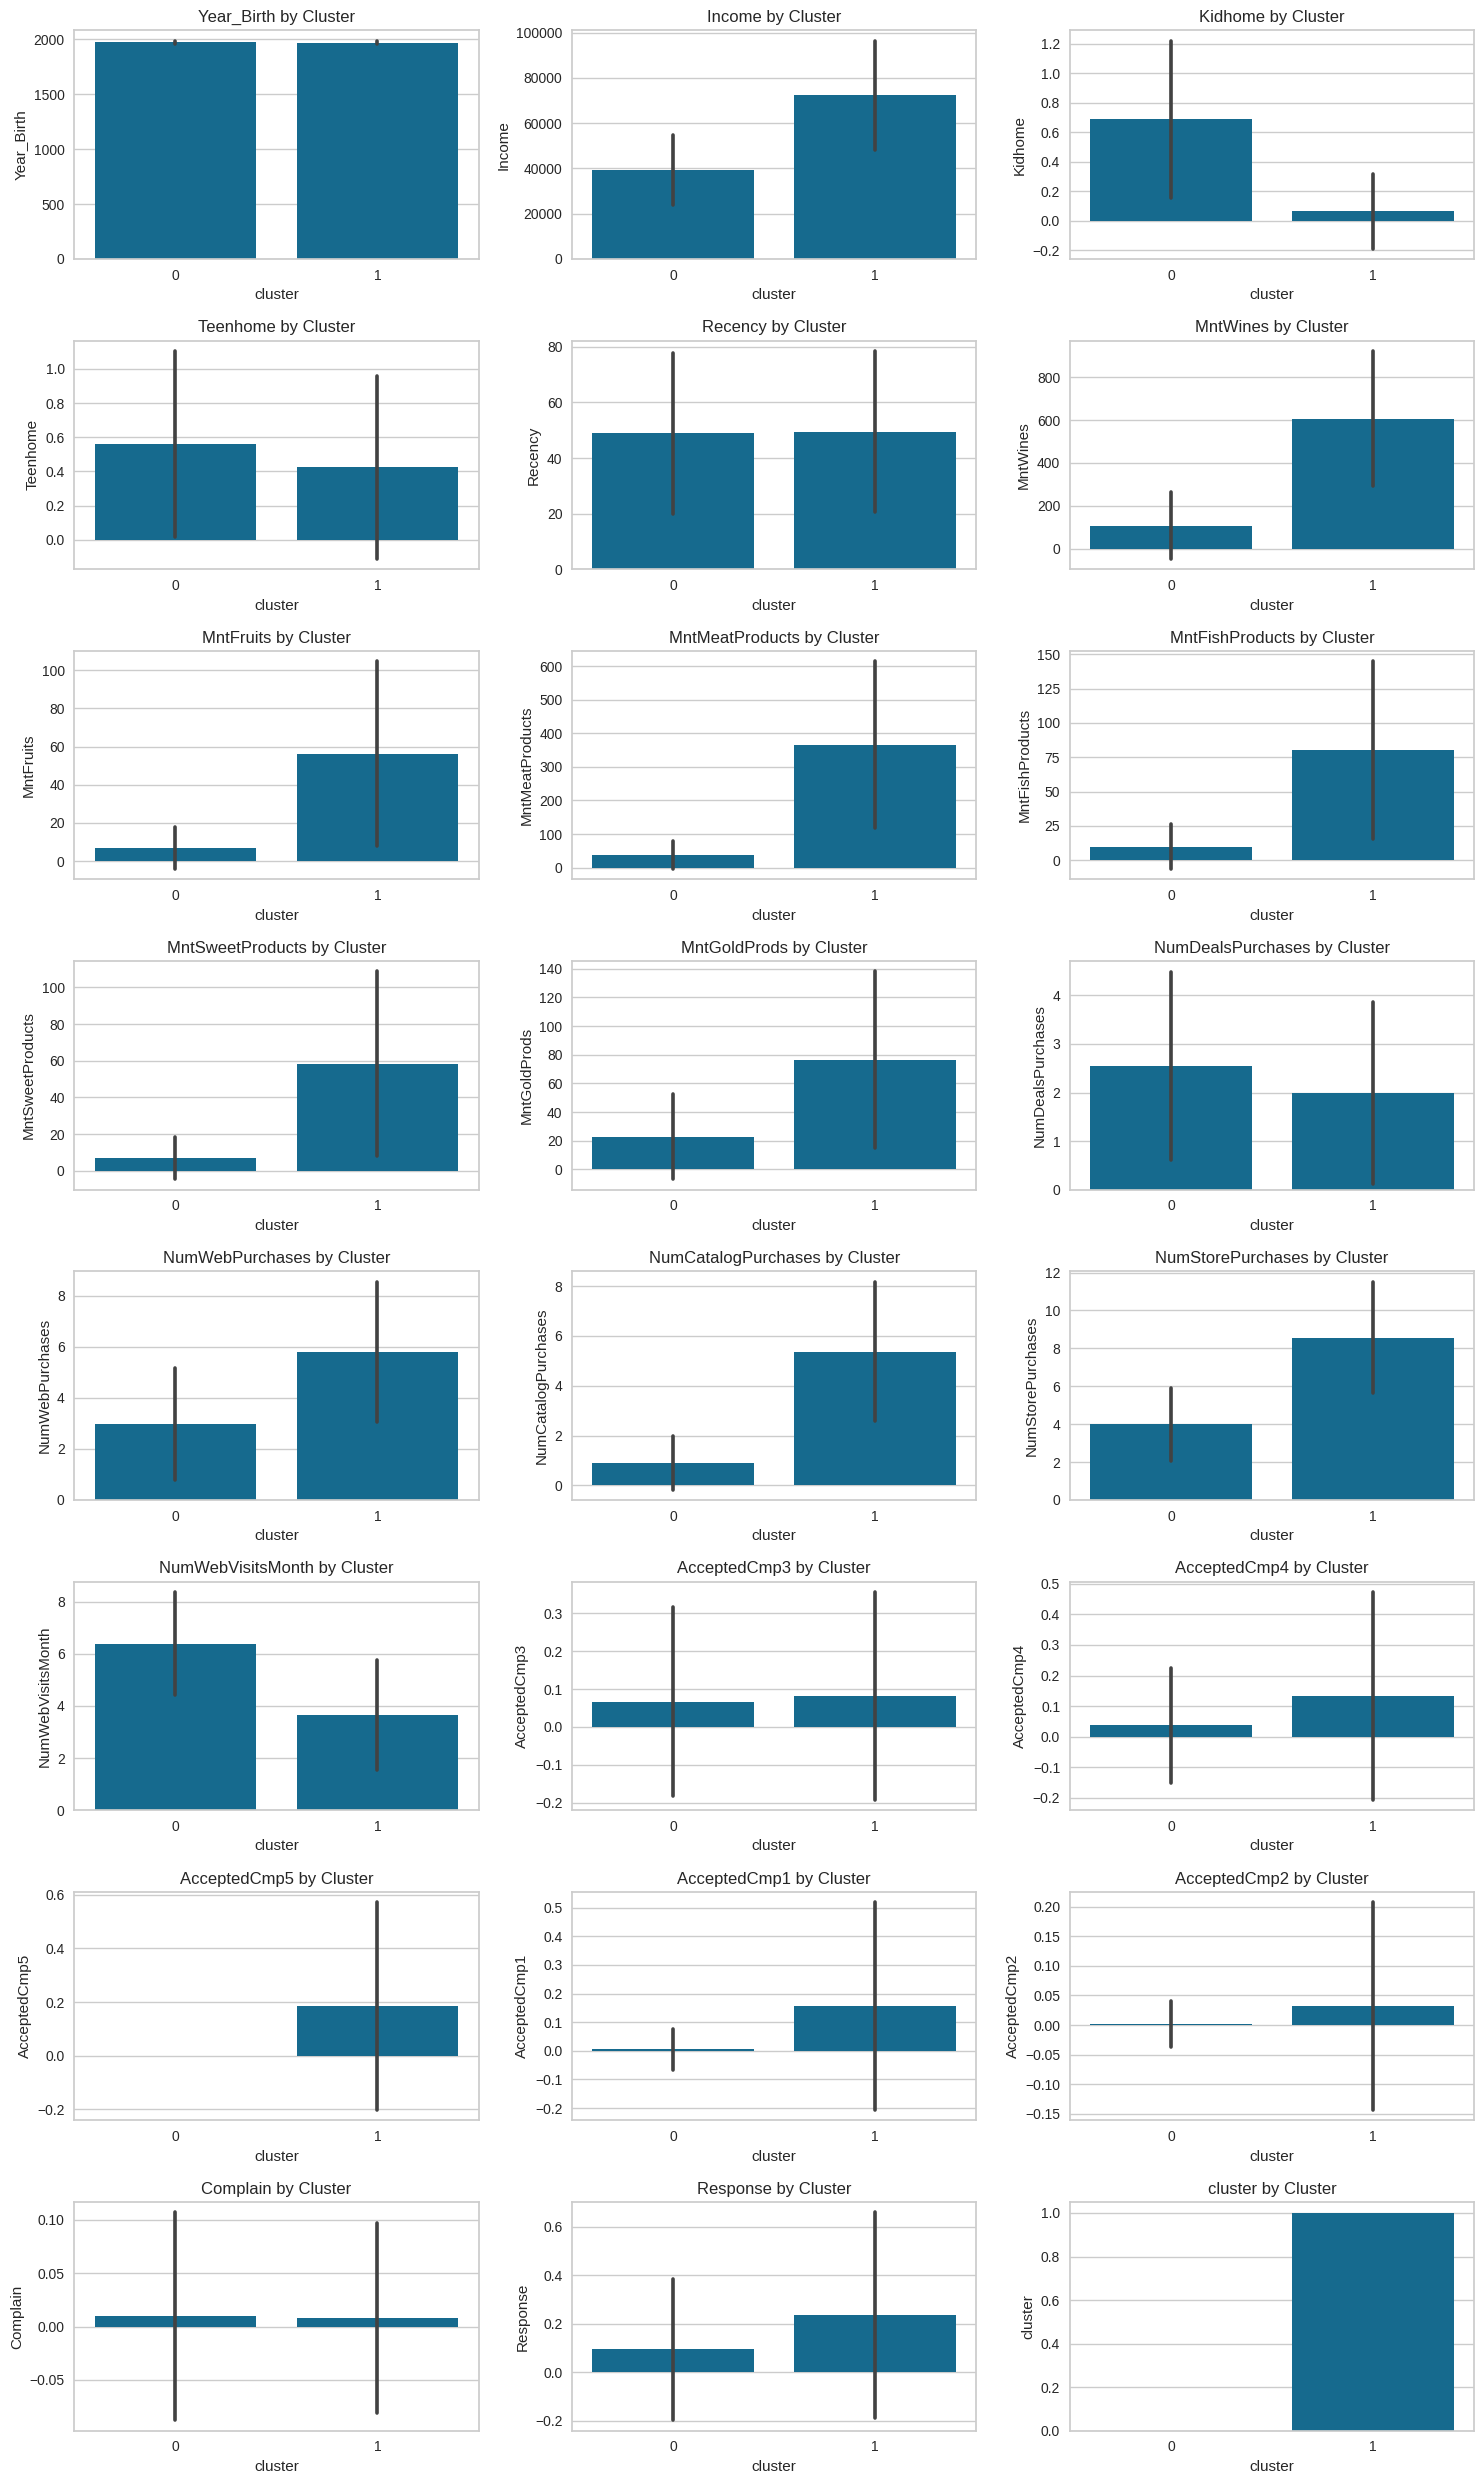

In [42]:
#K-means barplots
features = df_unscaled.columns
fig, axes = plt.subplots(nrows=(len(features) + 2) // 3, ncols=3, figsize=(15, 25))

for i, feature in enumerate(features):
    row = i // 3
    col = i % 3
    sns.barplot(data=df_unscaled, x='cluster', y=feature, ax=axes[row, col], estimator='mean', ci='sd')
    axes[row, col].set_title(f'{feature} by Cluster')

plt.tight_layout()
plt.show()


##### **Observations:**

 - Cluster 1: Affluent and Engaged Shoppers

  **Income**: Average income is $75,000 USD, indicating a higher economic status.

  **Household**: Typically have no young kids, though may have teens at home.

  **Spending Behavior**:   Spend over three times more on products compared to Cluster 0.

  Maintain a balanced use of all purchasing channels (web, catalog, and store).

  **Campaign Engagement**: More likely to accept marketing campaigns, showing a higher level of responsiveness and potential brand affinity.

 - Cluster 0: Budget-Conscious Families

  Income: Average income is $40,000 USD.

  **Household**: Commonly have 1 kid at home.

  **Shopping Habits**:   Rely more heavily on store purchases, while web and catalog usage is limited.

  Use an average of 2 to 3 discount codes, suggesting a price-sensitive behavior.

  **Campaign Engagement**: Tend to ignore campaigns, possibly due to lack of relevance or limited digital interaction.

## **Business Recommedations**

#### **Question 12**: Based on the cluster insights, what business recommendations can be provided?

**Tailored Campaigns**  

- Cluster 1:

  Target this group with premium products and exclusive offers—they demonstrate a higher spending capacity and are more responsive to marketing efforts.

- Cluster 0:

  Create cost-effective, value-driven promotions with a strong emphasis on discounts and in-store offers.
  Additionally, introduce special discounts on children’s products and extra incentives for using web and catalog channels—this can encourage digital engagement and increase overall traffic across platforms.

**Channel Strategy**
- Cluster 1:

  Continue promoting multichannel purchasing options, as they tend to engage across all available channels.

- Cluster 0:

  Focus on increasing awareness and usability of web and catalog purchasing, supported by exclusive online promotions and limited-time digital discounts to drive adoption.

**Customer Experience**

Use segmentation insights to tailor communications, promotions, and loyalty programs for each cluster.

Ensure messaging for Cluster 0 emphasizes value, savings, and family-friendly offers, while Cluster 1 receives personalized high-value content aligned with their premium preferences.